## Part One

### Set Up

In [318]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from IPython.display import display
import seaborn as sn

In [319]:
# Files to Load 
expenditure_file = "Resources/alcohol_expenditure.csv"
continent_file = "Resources/continent_code.csv"
climate_file = "Resources/country_climate.csv"
export_file = "Resources/country_export.csv"
industry_file = "Resources/country_industry.csv"
consumption_file = "Resources/country_consumption.csv"
happiness_file = "Resources/country_happiness.csv"

# Read csv and store into Pandas DataFrames
expenditure_data = pd.read_csv(expenditure_file)
continent_data = pd.read_csv(continent_file)
climate_data = pd.read_csv(climate_file)
export_data = pd.read_csv(export_file)
industry_data = pd.read_csv(industry_file)
consumption_data = pd.read_csv(consumption_file)
happiness_data = pd.read_csv(happiness_file)

### Clean Dataframes 

In [320]:
# Clean Dataframes before merge - expenditure_df

expenditure_df = expenditure_data.rename(columns={"Entity": "country", "Code": "country_code", "Year": "year", "Indicator:Alcohol expenditure as a per cent of total household expenditure": "alchol_expenditure(%)"})

# Clean Dataframes before merge - continent_df
continent_df = continent_data[["Continent_Name","Three_Letter_Country_Code"]]
continent_df = continent_df.rename(columns={"Three_Letter_Country_Code": "country_code", "Continent_Name": "continent" })

# Clean Dataframes before merge - climate_df
climate_df = climate_data[["COUNTRY","CLIMATE"]]
climate_df  = climate_df.rename(columns={"COUNTRY": "country", "CLIMATE": "climate" })

# Clean Dataframes before merge - consumption_df 
consumption_df  = consumption_data.rename(columns={"Entity": "country", "Code": "country_code", 
                                                   "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)": "consumption_per_capita_(L)"})

# Clean Dataframes before merge - happiness_df 
happiness_df = happiness_data[["Country name", "Regional indicator", "Ladder score", "Healthy life expectancy","Logged GDP per capita"]]
happiness_df = happiness_df.rename(columns= {"Country name": "country", "Regional indicator": "region", "Ladder score": "happy_score", "Healthy life expectancy": "life_expectancy", "Logged GDP per capita" : "gdp_per_capita"})


### Merge DataFrames
* expenditure_df
* continent_df
* climate_df
* export_data
* industry_data
* consumption_df
* happiness_df

In [331]:
# Combine the data into a single dataset. Identify/eliminate incomplete rows  
df_2 = pd.merge(expenditure_df, continent_df, how="outer", on=["country_code", "country_code"])  
df_2.count() 
df_2 = merged_df.dropna(how='any')

df_3 = pd.merge(df, climate_df, how="outer", on=["country", "country"])  
df_3 = df_3.dropna(how='any')

df_4 = pd.merge(df_3, export_data, how="outer", on=["country", "country"]) 
df_4 = df_4.dropna(how='any')

df_5 = pd.merge(df_4, industry_data, how="outer", on=["country", "country"]) 
df_5 = df_5.dropna(how='any')

df_6 = pd.merge(df_5, consumption_df, how="outer", on=["country_code", "country_code"]) 
df_6 = df_6[['country_x', 'country_code', 'year', 'alchol_expenditure(%)',
       'continent', 'climate', 'main_export', 'main_industry',
       'consumption_per_capita_(L)']]
df_6 = df_6.dropna(how='any')
df_6 = df_6.rename(columns= {"country_x": "country","alchol_expenditure(%)": "alcohol_expenditure"})

df_7 = pd.merge(df_6, happiness_df, how="outer", on=["country", "country"]) 
df_7 = df_7.dropna(how='any')
df_7.head()

,country,country_code,year,alcohol_expenditure,continent,climate,main_export,main_industry,consumption_per_capita_(L),region,happy_score,life_expectancy,gdp_per_capita
0,Albania,ALB,2007.0,2.1,Europe,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,7.5,Central and Eastern Europe,4.8827,68.708138,9.417931
1,Albania,ALB,2012.0,5.1,Europe,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,7.5,Central and Eastern Europe,4.8827,68.708138,9.417931
2,Albania,ALB,2013.0,4.8,Europe,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,7.5,Central and Eastern Europe,4.8827,68.708138,9.417931
3,Albania,ALB,2014.0,4.5,Europe,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,7.5,Central and Eastern Europe,4.8827,68.708138,9.417931
4,Armenia,ARM,1990.0,4.0,Europe,"highland continental, hot summers, cold winters",Processed and unprocessed diamonds,diamond-processing,5.5,Commonwealth of Independent States,4.6768,66.750656,9.100476


## Part Two - Data Summary

* Calculate how many rows of data there are
* Display a list of columns
* Display a list of countries
* Calculate total number of countries
* Calculate the measures of central tendency for alcohol expenditure as a percent of total household expenditure for each country
* Calculate the overall average alcohol expenditure as a percent of total household expenditure 
* Calculate overall average alcohol consumption
* Calculate total years of data compiled for each country 
* Determine which year(s) have the most data 


####  Calculate how many rows of data there are

In [332]:
total_rows = df_7.shape[0] 
print(f'The total number of rows represented in the dataset are: {total_rows}')  

The total number of rows represented in the dataset are: 491


####  Display a list of columns

In [333]:
df_7.columns

Index(['country', 'country_code', 'year', 'alcohol_expenditure', 'continent',
       'climate', 'main_export', 'main_industry', 'consumption_per_capita_(L)',
       'region', 'happy_score', 'life_expectancy', 'gdp_per_capita'],
      dtype='object')

#### Display a list of countries

In [334]:
df_7["country"].unique()

array(['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Belarus', 'Canada', 'Croatia', 'Denmark', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'Georgia', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Lebanon',
       'Lithuania', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand',
       'Norway', 'Philippines', 'Poland', 'Romania', 'Russia',
       'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Tajikistan', 'Thailand', 'Turkmenistan', 'Ukraine',
       'United Kingdom', 'United States', 'Uzbekistan', 'Zimbabwe'],
      dtype=object)

####  Calculate the total number of countries

In [335]:
number_countries = df_7['country'].nunique()
print(f"There are {number_countries} countries represented in the dataset.")  

# Alternative method
# unique_countries = df_7['country'].unique()
# number_countries = len(unique_countries)

There are 45 countries represented in the dataset.


#### Calculate the measures of central tendency for alcohol expenditure as a percent of total household expenditure for each country 


In [340]:
country_subset = df_7.groupby('country')

summary_stats_expenditure = country_subset.agg({"alcohol_expenditure": ['mean','median', 'var', 'std', 'sem']}) 
summary_stats_expenditure.head() 

alcohol_expenditure                                     
                          mean median       var       std       sem
country                                                            
Albania               4.125000   4.65  1.882500  1.372042  0.686021
Armenia               1.957143   1.70  0.483484  0.695330  0.107292
Australia             3.000000   2.90  0.312000  0.558570  0.228035
Austria               1.435000   1.40  0.009763  0.098809  0.022094
Azerbaijan            0.792857   0.60  0.101429  0.318479  0.060187

#### Calculate the overall average alcohol expenditure as a percent of total household expenditure 

In [349]:
# Create new dataframe
df_8 = pd.merge(df_7, summary_stats_expenditure, how="outer", on=["country", "country"])
df_8.head() 

# Group dataframe and use .first() method to exclude duplicate countries while calculating overall mean
grouped = df_8.groupby(('alcohol_expenditure', 'mean')) 
each_country = grouped["country"].first() 

each_country_df = pd.DataFrame(each_country).reset_index()

# each_country_df.columns
# #each_country_df
overall_avg_expenditure = each_country_df[('alcohol_expenditure', 'mean')].mean()

print(f"The overall average of alcohol expenditure (%) among countries represented in the dataset is: {overall_avg_expenditure} ")  


The overall average of alcohol expenditure (%) among countries represented in the dataset is: 2.6252962735142207 


#### Calculate the overall average alcohol consumption


In [350]:
overall_avg_consumption = df_8["consumption_per_capita_(L)"].mean() 
 
print(f"The overall average of alcohol consumption per capita (liters) among countries represented in the dataset is: {overall_avg_consumption}")  


The overall average of alcohol consumption per capita (liters) among countries represented in the dataset is: 8.882484725050885


#### Calculate total years of data compiled for each country 

In [351]:
# Method 1: 
total_years_series = df_7["country"].value_counts()
type(total_years_series)

# Method 2:
# years_of_data_grouped = alcohol_data.groupby(["Entity"])
# years_of_data_by_country = years_of_data_grouped["Entity"].count()
# years_of_data_by_country.sort_values(ascending=False)

#----------------------------------------------------
# Tangent - should we omit countries with insufficient years of data so we can look at historical trends?
total_years_df = pd.DataFrame(total_years_series)
total_years_df.columns = ["years_of_data"]

bins = [0, 5, 10, 45] 
group_names = ["less than 5 years of data","5+ years of data", "10+ years of data"] 

total_years_df["sufficient_data"] = pd.cut(total_years_df["years_of_data"], bins, labels=group_names) 
total_years_df.sample(10)

,years_of_data,sufficient_data
Greece,9,5+ years of data
Croatia,7,5+ years of data
Estonia,15,10+ years of data
Canada,25,10+ years of data
Ethiopia,1,less than 5 years of data
Ireland,10,5+ years of data
Russia,34,10+ years of data
Kazakhstan,12,10+ years of data
Armenia,42,10+ years of data
Austria,20,10+ years of data


#### Determine which year(s) have the most data 

In [352]:
years = df_7["year"].value_counts() 
years_df = pd.DataFrame(years).reset_index()

max_data = years_df._get_value(0,'year')
max_year = years_df.iloc[0, 0]


print(f"The year where we have the most data from the dataset is {max_year} with {max_data} countries represented") 


The year where we have the most data from the dataset is 2012.0 with 31 countries represented


In [422]:
df_8.columns

Index([                        'country',                    'country_code',
                                  'year',             'alcohol_expenditure',
                             'continent',                         'climate',
                           'main_export',                   'main_industry',
            'consumption_per_capita_(L)',                          'region',
                           'happy_score',                 'life_expectancy',
                        'gdp_per_capita',   ('alcohol_expenditure', 'mean'),
       ('alcohol_expenditure', 'median'),    ('alcohol_expenditure', 'var'),
          ('alcohol_expenditure', 'std'),    ('alcohol_expenditure', 'sem')],
      dtype='object')

#### Find the 10 countries that consumes the most alcohol 


In [457]:
country_mask = df_8.groupby("country")
country_subset = country_mask.first()

high_consumption = country_subset.sort_values([("consumption_per_capita_(L)")], ascending=False).head(n=10)
high_consumption.reset_index() 

high_consumption_series = high_consumption["consumption_per_capita_(L)"]  
high_consumption_df = pd.DataFrame(high_consumption_series)

high_consumption_df

,consumption_per_capita_(L)
country,
Moldova,15.2
Lithuania,15.0
Ireland,13.0
France,12.6
Slovenia,12.6
Romania,12.6
Russia,11.7
Austria,11.6
Poland,11.6


#### Find the 10 countries that consumes the least alcohol 

In [458]:
low_consumption = country_subset.sort_values([("consumption_per_capita_(L)")], ascending=True).head(n=10)
low_consumption.reset_index() 

low_consumption_series = low_consumption["consumption_per_capita_(L)"]  
low_consumption_df = pd.DataFrame(low_consumption_series)

low_consumption_df

,consumption_per_capita_(L)
country,
Azerbaijan,0.8
Lebanon,1.5
Singapore,2.0
Uzbekistan,2.7
Ethiopia,2.8
Tajikistan,3.3
Zimbabwe,4.8
Turkmenistan,5.4
Armenia,5.5


#### Find the top 10 countries that have the highest alcohol expenditure 

In [459]:
# Call previous dataframe with Boolean Mask 'alcohol_expenditure, mean' + first() method
# each_country_df.columns

# Find top 10 countries for alcohol expenditure
top_10_expenditure = each_country_df.sort_values([('alcohol_expenditure', 'mean')], ascending=False).head(n=10) 
top_10_expenditure


,"(alcohol_expenditure, mean)",country
44,7.800000,South Africa
43,7.630000,Ireland
42,7.000000,Zimbabwe
41,6.360000,Poland
40,5.700000,United Kingdom
39,5.252174,Finland
38,4.266667,Kazakhstan
37,4.125000,Albania
36,3.600000,Ethiopia
35,3.575000,Belarus


#### Find the bottom 10 countries that have the lowest alcohol expenditure 

In [419]:
# Find bottom 10 countries for alcohol expenditure
bottom_10_expenditure = each_country_df.sort_values([('alcohol_expenditure', 'mean')], ascending=True).head(n=10)
bottom_10_expenditure

#bottom_expenditure_country = bottom_10_expenditure.loc[0,"country"],bottom_10_expenditure.loc[1,"country"], bottom_10_expenditure.loc[2,"country"], bottom_10_expenditure.loc[3,"country"], bottom_10_expenditure.loc[4,"country"]
#print(f'The ten countries that spend the least on alcohol are: {bottom_expenditure_country}') 

,"(alcohol_expenditure, mean)",country
0,0.050000,Lebanon
1,0.300000,Singapore
2,0.600000,Philippines
3,0.634000,Netherlands
4,0.781818,Tajikistan
5,0.792857,Azerbaijan
6,0.935714,United States
7,0.944444,Greece
8,1.000000,Slovenia
9,1.178947,Japan


## Part Two Data Summary


In [353]:
print(f'Total number of rows represented in the dataset: {total_rows}')  
print(f"Total number of countries represented in the dataset: {number_countries}")
print(f"Overall average of alcohol expenditure (%): {overall_avg_expenditure} ")  
print(f"Overall average of alcohol consumption per capita (liters): {overall_avg_consumption}")  
print(f"Max countries reporting alcohol expenditure (%): {max_year}")
print(f"Number of countries reporting alcohol expenditure in {max_year}: {max_data}")


Total number of rows represented in the dataset: 491
Total number of countries represented in the dataset: 45
Overall average of alcohol expenditure (%): 2.6252962735142207 
Overall average of alcohol consumption per capita (liters): 8.882484725050885
Max countries reporting alcohol expenditure (%): 2012.0
Number of countries reporting alcohol expenditure in 2012.0: 31


## Part Three  - Continent & Region

In [359]:
df_8.head()

continent_subset = 

,country,country_code,year,alcohol_expenditure,continent,climate,main_export,main_industry,consumption_per_capita_(L),region,happy_score,life_expectancy,gdp_per_capita,"(alcohol_expenditure, mean)","(alcohol_expenditure, median)","(alcohol_expenditure, var)","(alcohol_expenditure, std)","(alcohol_expenditure, sem)"
0,Albania,ALB,2007.0,2.1,Europe,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,7.5,Central and Eastern Europe,4.8827,68.708138,9.417931,4.125000,4.65,1.882500,1.372042,0.686021
1,Albania,ALB,2012.0,5.1,Europe,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,7.5,Central and Eastern Europe,4.8827,68.708138,9.417931,4.125000,4.65,1.882500,1.372042,0.686021
2,Albania,ALB,2013.0,4.8,Europe,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,7.5,Central and Eastern Europe,4.8827,68.708138,9.417931,4.125000,4.65,1.882500,1.372042,0.686021
3,Albania,ALB,2014.0,4.5,Europe,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,7.5,Central and Eastern Europe,4.8827,68.708138,9.417931,4.125000,4.65,1.882500,1.372042,0.686021
4,Armenia,ARM,1990.0,4.0,Europe,"highland continental, hot summers, cold winters",Processed and unprocessed diamonds,diamond-processing,5.5,Commonwealth of Independent States,4.6768,66.750656,9.100476,1.957143,1.70,0.483484,0.695330,0.107292


### Part Four - Correlation & Regression

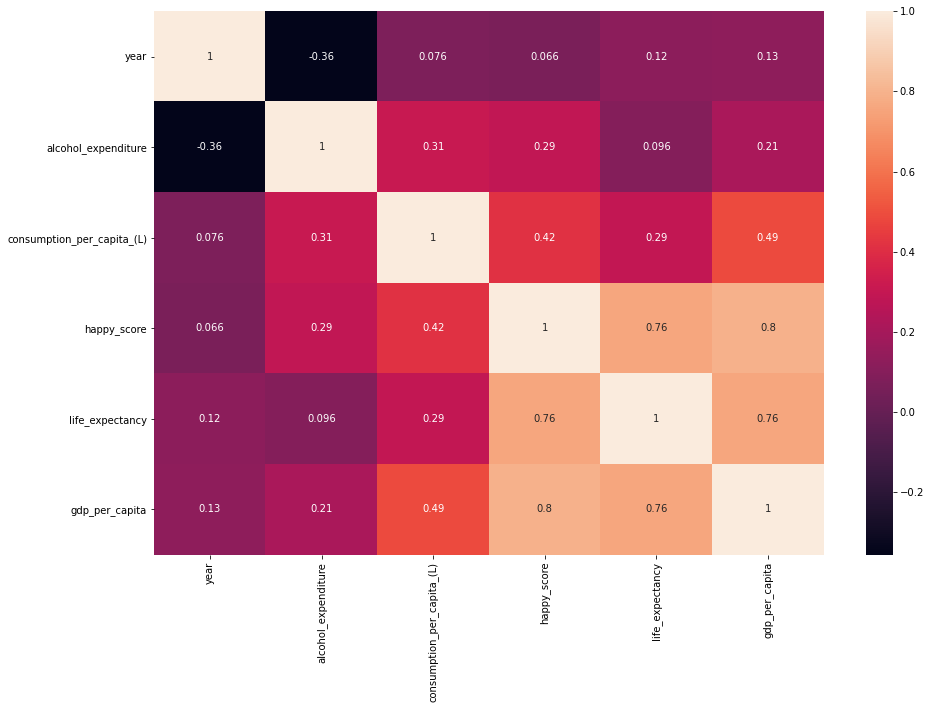

In [356]:
# Explore potential relationships by creating correlation matrix
from matplotlib.pyplot import figure

df_7_corr = df_7.corr()
df_7_corr.unstack().sort_values()

plt.rcParams['figure.figsize'] = (15.0, 10.0)
figure = (sn.heatmap(df_7_corr, annot=True,))



In [461]:
df_8.columns

Index([                        'country',                    'country_code',
                                  'year',             'alcohol_expenditure',
                             'continent',                         'climate',
                           'main_export',                   'main_industry',
            'consumption_per_capita_(L)',                          'region',
                           'happy_score',                 'life_expectancy',
                        'gdp_per_capita',   ('alcohol_expenditure', 'mean'),
       ('alcohol_expenditure', 'median'),    ('alcohol_expenditure', 'var'),
          ('alcohol_expenditure', 'std'),    ('alcohol_expenditure', 'sem')],
      dtype='object')